## Using Pre-Trained Models.
Here we will load two different pre-trained models, VGG16 and ResNet.

Optional: use camera to take a picture or find images on the internet and download them.

In [1]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
from scipy.misc import imread
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [3]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [4]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the rocking chair Image
    img_path = "data/rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

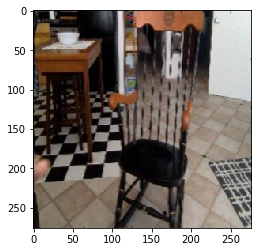

In [5]:
img_path = "data/rocking_chair.jpg"
plt.imshow(imread(img_path))

## VGG16 - Pretrained Model

In [6]:
from keras.applications import vgg16
vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [8]:
img_path="data/rocking_chair.jpg"
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n04501370,turnstile,0.078113
1,n02791124,barber_chair,0.064270
2,n04005630,prison,0.058300
3,n04239074,sliding_door,0.054161
4,n04081281,restaurant,0.052949
5,n03899768,patio,0.046128
6,n04200800,shoe_shop,0.039694
7,n03201208,dining_table,0.032403
8,n03347037,fire_screen,0.031817
9,n04099969,rocking_chair,0.029146


In [9]:
img_path="data/truck.jpg"
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n04467665,trailer_truck,0.884076
1,n03417042,garbage_truck,0.060159
2,n04065272,recreational_vehicle,0.027927
3,n03776460,mobile_home,0.010934
4,n03796401,moving_van,0.006001
5,n04461696,tow_truck,0.004396
6,n04044716,radio_telescope,0.000808
7,n04465501,tractor,0.000766
8,n03445924,golfcart,0.000663
9,n03496892,harvester,0.000594


In [10]:
img_path="data/dogs.jpg"
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n02107142,Doberman,0.796106
1,n02089078,black-and-tan_coonhound,0.197621
2,n02101006,Gordon_setter,0.003700
3,n02106550,Rottweiler,0.000743
4,n02088632,bluetick,0.000644
5,n02088094,Afghan_hound,0.000237
6,n03803284,muzzle,0.000219
7,n02109047,Great_Dane,0.000206
8,n02088466,bloodhound,0.000200
9,n02091831,Saluki,0.000115


## Resnet50 - Pretrained Model

In [11]:
# Define a Resnet model and print the model summary
from keras.applications import resnet50
resnet50_model = resnet50.ResNet50(weights='imagenet')
resnet50_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_2[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

,Predicted Class,Name,Probability
0,n03347037,fire_screen,0.298988
1,n04265275,space_heater,0.109265
2,n04005630,prison,0.082955
3,n02791124,barber_chair,0.050781
4,n03899768,patio,0.045769
5,n04081281,restaurant,0.037075
6,n04330267,stove,0.023699
7,n03661043,library,0.017474
8,n04239074,sliding_door,0.017061
9,n02747177,ashcan,0.013846


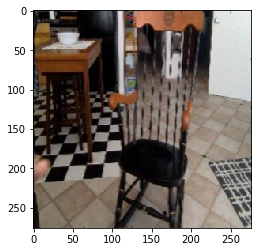

In [12]:
img_path="data/rocking_chair.jpg"
plt.imshow(imread(img_path))
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

,Predicted Class,Name,Probability
0,n04467665,trailer_truck,0.870640
1,n04065272,recreational_vehicle,0.067914
2,n03417042,garbage_truck,0.026442
3,n03796401,moving_van,0.016279
4,n03769881,minibus,0.005072
5,n03895866,passenger_car,0.003803
6,n03776460,mobile_home,0.002066
7,n03496892,harvester,0.001270
8,n03393912,freight_car,0.000891
9,n03967562,plow,0.000833


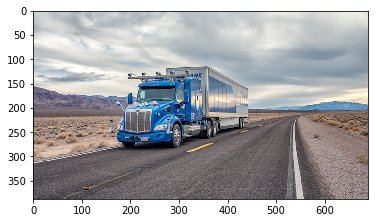

In [13]:
img_path="data/truck.jpg"
plt.imshow(imread(img_path))
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

,Predicted Class,Name,Probability
0,n02487347,macaque,0.902441
1,n02486410,baboon,0.092465
2,n02486261,patas,0.002749
3,n02484975,guenon,0.001943
4,n02488291,langur,0.000322
5,n02489166,proboscis_monkey,0.000015
6,n02493793,spider_monkey,0.000013
7,n02493509,titi,0.000010
8,n02494079,squirrel_monkey,0.000009
9,n02481823,chimpanzee,0.000004


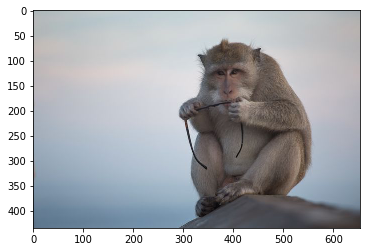

In [14]:
img_path="data/monkey.jpg"
plt.imshow(imread(img_path))
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

,Predicted Class,Name,Probability
0,n02106550,Rottweiler,0.511656
1,n02089078,black-and-tan_coonhound,0.265104
2,n02101006,Gordon_setter,0.105474
3,n02107142,Doberman,0.055984
4,n02107574,Greater_Swiss_Mountain_dog,0.006632
5,n02088466,bloodhound,0.006520
6,n02107908,Appenzeller,0.005083
7,n02108551,Tibetan_mastiff,0.003400
8,n02088632,bluetick,0.003227
9,n02484975,guenon,0.002142


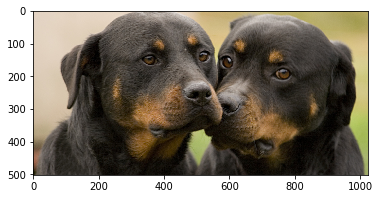

In [15]:
img_path="data/dogs.jpg"
plt.imshow(imread(img_path))
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)